In [1]:
# import resources
from random import randint
import numpy as np
import torch
import torchvision
import torch.nn.functional as f
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
df = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

print(df.shape)
df.head(2)

(381109, 12)


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


an inital peek at the dataset and its dimensions

<AxesSubplot:xlabel='Response', ylabel='count'>

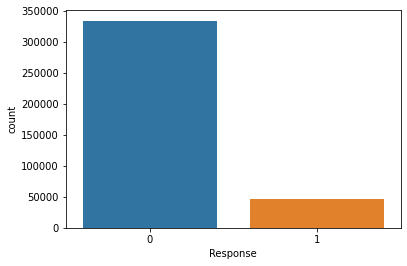

In [3]:
# a look at the label distribution
sns.countplot(x=df['Response'])

The distribution is very uneven so we'll need to account for non iid data

In [4]:
yes_ins = df[df['Response'] == 1]
no_ins = df[df['Response'] == 0]

df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


A quick look at some facts about our columns, we can ignore the nonordinal column stats. We can also break up our dataset by label to 
view those stats as well

In [5]:
yes_ins.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,46710.000000,46710.000000,46710.000000,46710.000000,46710.000000,46710.000000,46710.000000,46710.000000,46710.0
mean,190152.264504,43.435560,0.999122,26.762963,0.003383,31604.092742,91.869086,154.112246,1.0
std,109797.768735,12.168924,0.029614,11.785157,0.058062,18646.508040,56.015074,83.738574,0.0
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,1.0
25%,94677.750000,35.000000,1.000000,21.000000,0.000000,24868.000000,26.000000,82.000000,1.0
50%,190495.500000,43.000000,1.000000,28.000000,0.000000,33002.000000,124.000000,154.000000,1.0
75%,285272.250000,51.000000,1.000000,30.000000,0.000000,41297.000000,136.000000,226.000000,1.0
max,381098.000000,83.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.0


In [6]:
no_ins.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,334399.000000,334399.000000,334399.000000,334399.000000,334399.000000,334399.000000,334399.000000,334399.000000,334399.0
mean,190611.255476,38.178227,0.997694,26.336544,0.521742,30419.160276,114.851040,154.380243,0.0
std,110047.448167,15.816052,0.047962,13.418504,0.499528,16998.293197,53.342899,83.661975,0.0
min,2.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.0
25%,95378.500000,24.000000,1.000000,15.000000,0.000000,24351.000000,61.000000,82.000000,0.0
50%,190562.000000,34.000000,1.000000,28.000000,1.000000,31504.000000,152.000000,154.000000,0.0
75%,285926.500000,49.000000,1.000000,36.000000,1.000000,39120.000000,152.000000,227.000000,0.0
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,0.0


<AxesSubplot:ylabel='Gender'>

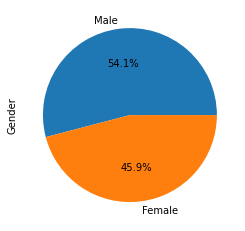

In [7]:
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%')

a look at the distribution by gender and the response by gender below

Text(0.5, 1.0, 'yes by gender')

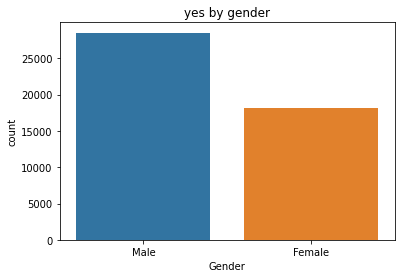

In [8]:

sns.countplot(x=yes_ins['Gender']).set_title('yes by gender')


Text(0.5, 1.0, 'no by gender')

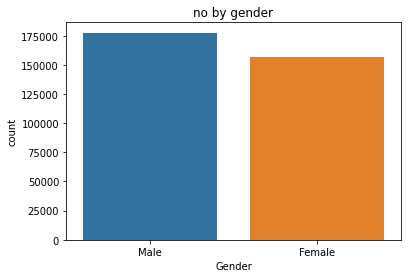

In [9]:
sns.countplot(x=no_ins['Gender']).set_title('no by gender')

we see that there's a larger difference in the number of women who say yes than the number of women who say no to additiona insurance

Text(0.5, 1.0, 'age')

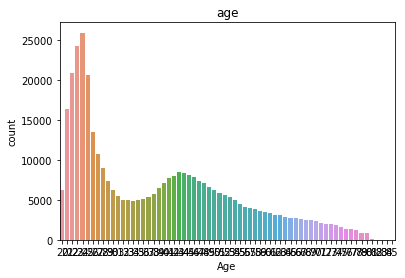

In [10]:
sns.countplot(x=df['Age']).set_title('age')

Text(0.5, 1.0, 'yes by age')

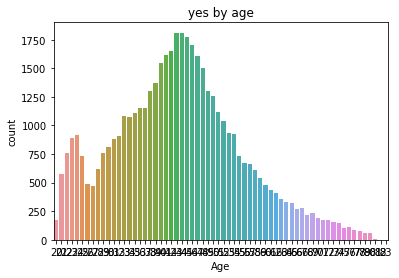

In [11]:
sns.countplot(x=yes_ins['Age']).set_title('yes by age')

Text(0.5, 1.0, 'no by age')

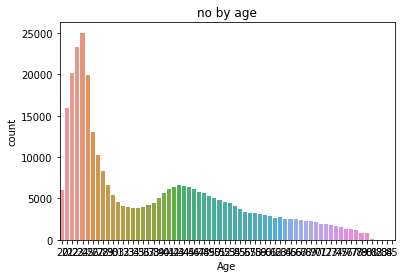

In [12]:
sns.countplot(x=no_ins['Age']).set_title('no by age')

we see that age seems to be a significant factor in opting in or out for additional insurance

<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

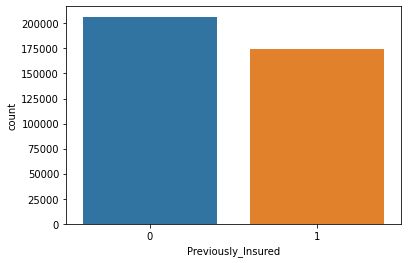

In [13]:
sns.countplot(x=df['Previously_Insured'])

<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

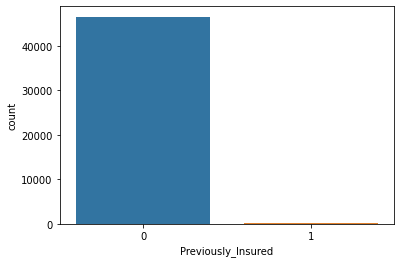

In [14]:
sns.countplot(x=yes_ins['Previously_Insured'])

though we have a very even distribution of those previously insured or not, relatively very few that opt in have been previously insured

<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

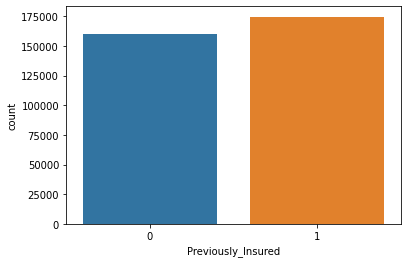

In [15]:
sns.countplot(x=no_ins['Previously_Insured'])

<AxesSubplot:xlabel='Driving_License', ylabel='count'>

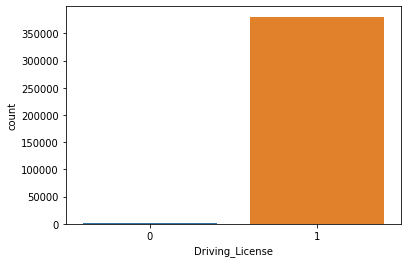

In [16]:
sns.countplot(x=df['Driving_License'])

nearly all are licensed drivers

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

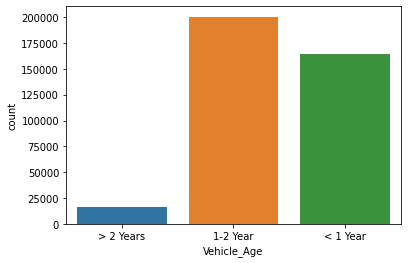

In [17]:
sns.countplot(x=df['Vehicle_Age'])

C:\Users\johns\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Annual_Premium'>

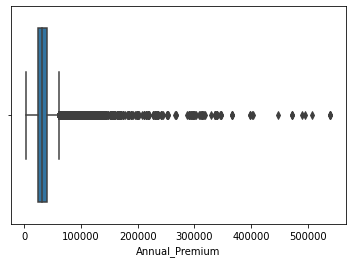

In [18]:
sns.boxplot(df['Annual_Premium'])
# sns.distplot(x=df['Annual_Premium'])

annual premium has a large number of outliers

C:\Users\johns\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

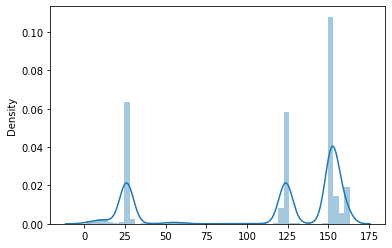

In [19]:
sns.distplot(x=df['Policy_Sales_Channel'])

we see that most people fall into a few popular sales channels

<AxesSubplot:>

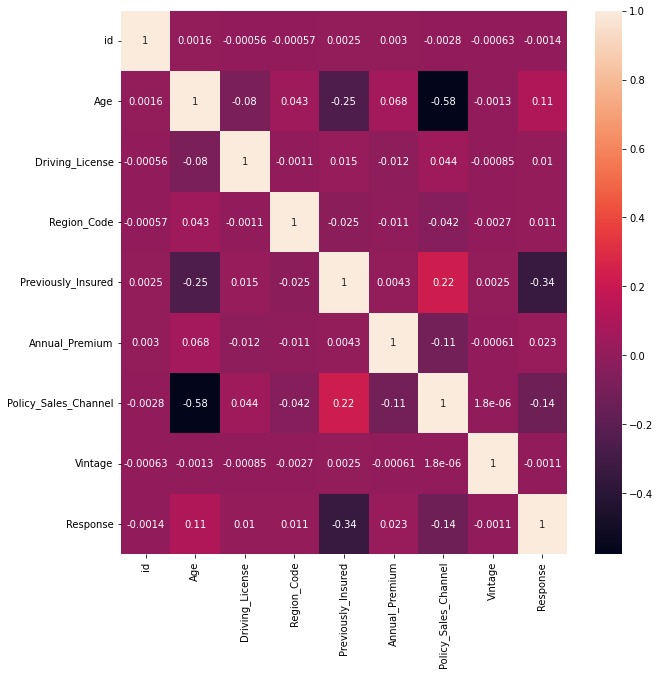

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

it appears as though policy sales channel and being previously insured are the highest correlated columns of the featurese

In [21]:
from sklearn.preprocessing import StandardScaler as sc
scaler = sc()

def prep_data(df):
    
    df['Vehicle_Age'].replace({'> 2 Years':3, '1-2 Year':1.5, '< 1 Year':0}, inplace=True)
    df['Gender'].replace({'Male':0, 'Female':1}, inplace=True)
    df['Vehicle_Damage'].replace({'Yes':1, 'No':0})

    dummies = pd.get_dummies(df['Vehicle_Damage'])
    result = pd.concat([df, dummies], axis=1)

    labels = df['Response']
    data = result.drop(['Vehicle_Damage', 'id', 'Response', 'Annual_Premium'], axis=1)

    scaled_data = scaler.fit_transform(data)

    data = np.array(scaled_data)
    labels = np.array(labels)

    split_point = int(len(data) * 0.9)
    train_data = data[:split_point]
    test_data = data[split_point:]
    train_labels = labels[:split_point]
    test_labels = labels[split_point:]

    return train_data, train_labels, test_data, test_labels


In [22]:
print(len(yes_ins))
print(len(no_ins))

46710
334399


In [23]:
no_ins = no_ins.sample(n=len(yes_ins))
print(len(yes_ins))
print(len(no_ins))

46710
46710


In [24]:
df = pd.concat([yes_ins, no_ins])
print(len(df))

df = df.sample(frac=1)

df.head()

93420


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
35775,35776,Male,31,1,23.0,0,1-2 Year,Yes,26548.0,157.0,45,0
85586,85587,Male,48,1,28.0,0,1-2 Year,Yes,62675.0,124.0,270,1
47656,47657,Male,23,1,32.0,0,1-2 Year,Yes,29129.0,124.0,71,0
171509,171510,Female,40,1,29.0,1,1-2 Year,No,2630.0,124.0,262,0
217929,217930,Female,34,1,28.0,0,1-2 Year,Yes,37963.0,26.0,294,1


In [25]:
train_data, train_labels, test_data, test_labels = prep_data(df)


In [26]:
len(train_data[0])

10

In [27]:
# define nn
class NN(torch.nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.layer1 = torch.nn.Linear(len(train_data[0]), 64)
        self.layer2 = torch.nn.Linear(64, 128)
        self.layer3 = torch.nn.Linear(128, 1)

    def forward(self, x):
        x = self.layer1(x)
        x = f.relu(x)
        x = f.dropout(x, 0.25)  # dropout 
        x = self.layer2(x)
        x = f.relu(x)
        x = f.dropout(x, 0.25)
        x = self.layer3(x)
        x = torch.sigmoid(x)
        return x


In [28]:
model = NN()

epochs = 20
batches = 50
opt = torch.optim.Adam(model.parameters(), lr=0.00005, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01, amsgrad=False)
loss_fn = torch.nn.BCELoss()


In [29]:

train_loss = []
train_accuracy = []
batch_size = int(len(train_data) / batches)

from sklearn.utils import shuffle

for j in range(epochs):

    train_data, train_labels = shuffle(train_data, train_labels)

    for i in range(batches):

        batch_data = train_data[batch_size*i : batch_size*i + batch_size]
        batch_t = torch.FloatTensor(batch_data)

        batch_labels = train_labels[batch_size*i : batch_size*i + batch_size]
        batch_labels_t = torch.FloatTensor(batch_labels).reshape(-1, 1)

        pred = model(batch_t)
        loss = loss_fn(pred, batch_labels_t)
        loss.backward()
        opt.step()
        opt.zero_grad()

        pred_class = np.where(pred.detach().numpy()<0.5, 0, 1)
        accuracy = np.sum(batch_labels.reshape(-1,1)==pred_class) / len(batch_labels)
        
        train_accuracy.append(accuracy)
        train_loss.append(loss.item())


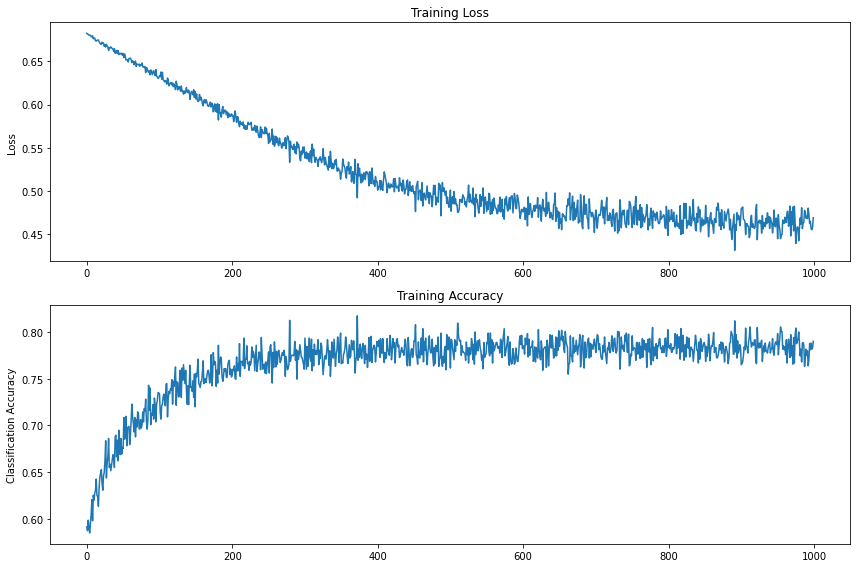

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(12,8))
ax[0].plot(train_loss)
ax[0].set_ylabel('Loss')
ax[0].set_title('Training Loss')

ax[1].plot(train_accuracy)
ax[1].set_ylabel('Classification Accuracy')
ax[1].set_title('Training Accuracy')

plt.tight_layout()
plt.show()
    


In [32]:
from sklearn.metrics import accuracy_score, classification_report

pred = model(torch.FloatTensor(test_data)).detach()
pred_class = np.where(pred.detach().numpy()<0.5, 0, 1)
acc = accuracy_score(pred_class, test_labels)
print(classification_report(pred_class, test_labels))
print('accuracy: ' + str(acc))



              precision    recall  f1-score   support

           0       0.61      0.94      0.74      3092
           1       0.96      0.70      0.81      6250

    accuracy                           0.78      9342
   macro avg       0.79      0.82      0.78      9342
weighted avg       0.85      0.78      0.79      9342

accuracy: 0.7832369942196532


In [33]:
# save model
PATH = 'insurance_model.pt'
torch.save(model.state_dict(), PATH)

In [36]:

model2 = NN()
PATH = 'insurance_model.pt'
model2.load_state_dict(torch.load(PATH))

gender = 0
age = 47
licensed = 1
region = 28.0
insured = 0
car_age = 3.0
damaged = 1
policy = 26.0
vintage = 27

sample_input = [1, gender, age, licensed, region, insured, car_age, damaged, policy, vintage]

output = model2(torch.FloatTensor(sample_input))

print(output.item())

2.2490322862545126e-17
